In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/heart_disease_health_indicators_BRFSS2015.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


# Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack'].astype(int)

## Without Demensional Reduction

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     45957
           1       0.25      0.80      0.38      4779

    accuracy                           0.75     50736
   macro avg       0.61      0.77      0.61     50736
weighted avg       0.90      0.75      0.80     50736

[[34422 11535]
 [  970  3809]]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     68936
           1       0.25      0.80      0.38      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

[[51511 17425]
 [ 1463  5705]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

lrm = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     91915
           1       0.25      0.80      0.38      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.75      0.80    101472

[[68575 23340]
 [ 1954  7603]]


## Dimensional Reduction

### PCA

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     45957
           1       0.24      0.78      0.37      4779

    accuracy                           0.75     50736
   macro avg       0.61      0.76      0.61     50736
weighted avg       0.90      0.75      0.80     50736

[[34358 11599]
 [ 1049  3730]]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     68936
           1       0.24      0.78      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.76      0.61     76104
weighted avg       0.90      0.75      0.80     76104

[[51471 17465]
 [ 1578  5590]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


lrm = LogisticRegression(max_iter=10000, class_weight='balanced')
lrm.fit(X_train_pca, y_train)

y_pred = lrm.predict(X_test_pca)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     91915
           1       0.24      0.78      0.37      9557

    accuracy                           0.75    101472
   macro avg       0.61      0.76      0.61    101472
weighted avg       0.90      0.75      0.80    101472

[[68478 23437]
 [ 2075  7482]]


# Multi-Layer Perceptron

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.ops as ops
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

torch.manual_seed(42)
np.random.seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class HeartDiseaseDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

print("Loading dataset...")
data = pd.read_csv('data/heart_disease_health_indicators_BRFSS2015.csv')
print(f"Dataset shape: {data.shape}")
print(data.head())

X = data.drop('HeartDiseaseorAttack', axis=1).values
y = data['HeartDiseaseorAttack'].values

Using device: cpu
Loading dataset...
Dataset shape: (253680, 22)
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0     

In [10]:
unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for value, count in zip(unique, counts):
    print(f"Class {value}: {count} samples ({100 * count / len(y):.2f}%)")

total_size = len(X)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)


Class distribution:
Class 0.0: 229787 samples (90.58%)
Class 1.0: 23893 samples (9.42%)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class HeartDiseaseMLPClassifier(nn.Module):
    def __init__(self, input_size, num_classes=2, class_frequencies=None):
        super(HeartDiseaseMLPClassifier, self).__init__()

        self.mlp = ops.MLP(
            in_channels=input_size,
            hidden_channels=[128, 64, 32],  # 3 hidden layers
            norm_layer=nn.BatchNorm1d,      # batch normalization
            activation_layer=nn.ReLU,       # ReLU activation
            dropout=0.3,                    # 30% dropout for regularization
            bias=True
        )

        # Output layer for binary classification
        self.classifier = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        if class_frequencies:
            self.weights = torch.tensor([1.0 / (freq + 1e-7) for freq in class_frequencies], device=device)
        else:
            self.weights = torch.ones(num_classes, device=device)

    def forward(self, x):
        x = self.mlp(x)
        x = self.classifier(x)
        x = self.sigmoid(x)
        return x.squeeze(-1)

    def get_weighted_loss(self, outputs, labels):
        # Ensure outputs and labels are on the same device
        outputs = outputs.to(self.weights.device)
        labels = labels.to(self.weights.device)
        labels = labels.float()

        # For binary classification with sigmoid outputs
        criterion = nn.BCELoss(reduction='none')
        loss = criterion(outputs, labels)

        # Apply class weights for binary classification
        weighted_loss = torch.zeros_like(loss)

        # Class 1 (positive samples)
        positive_mask = (labels == 1)
        if positive_mask.any():
            weighted_loss[positive_mask] = loss[positive_mask] * self.weights[1]

        # Class 0 (negative samples)
        negative_mask = (labels == 0)
        if negative_mask.any():
            weighted_loss[negative_mask] = loss[negative_mask] * self.weights[0]

        return weighted_loss.mean()

Using device: cpu


## Without weight-balanced

In [12]:
input_features = X.shape[1]
model = HeartDiseaseMLPClassifier(input_features).to(device)
print(model)

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

HeartDiseaseMLPClassifier(
  (mlp): MLP(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): Dropout(p=0.3, inplace=False)
  )
  (classifier): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [13]:
num_epochs = 20
train_losses = []
val_losses = []
val_aucs = []

print("\nStarting training...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = model(data)

        target = target.float()
        output = output.float()
        loss = criterion(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 0.7398
Epoch: 1/20, Batch: 50/1586, Loss: 0.1972
Epoch: 1/20, Batch: 100/1586, Loss: 0.2594
Epoch: 1/20, Batch: 150/1586, Loss: 0.1936
Epoch: 1/20, Batch: 200/1586, Loss: 0.2085
Epoch: 1/20, Batch: 250/1586, Loss: 0.2534
Epoch: 1/20, Batch: 300/1586, Loss: 0.2134
Epoch: 1/20, Batch: 350/1586, Loss: 0.3019
Epoch: 1/20, Batch: 400/1586, Loss: 0.2302
Epoch: 1/20, Batch: 450/1586, Loss: 0.2073
Epoch: 1/20, Batch: 500/1586, Loss: 0.3941
Epoch: 1/20, Batch: 550/1586, Loss: 0.1913
Epoch: 1/20, Batch: 600/1586, Loss: 0.2019
Epoch: 1/20, Batch: 650/1586, Loss: 0.2955
Epoch: 1/20, Batch: 700/1586, Loss: 0.2756
Epoch: 1/20, Batch: 750/1586, Loss: 0.1962
Epoch: 1/20, Batch: 800/1586, Loss: 0.2056
Epoch: 1/20, Batch: 850/1586, Loss: 0.2832
Epoch: 1/20, Batch: 900/1586, Loss: 0.2440
Epoch: 1/20, Batch: 950/1586, Loss: 0.2254
Epoch: 1/20, Batch: 1000/1586, Loss: 0.4109
Epoch: 1/20, Batch: 1050/1586, Loss: 0.2942
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45997
         1.0       0.62      0.09      0.15      4739

    accuracy                           0.91     50736
   macro avg       0.77      0.54      0.55     50736
weighted avg       0.89      0.91      0.88     50736


Confusion Matrix:


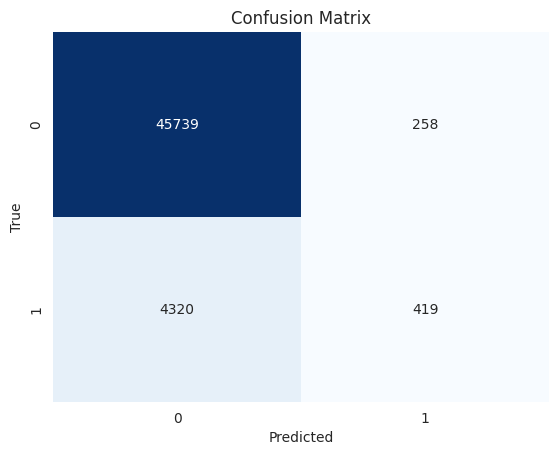

In [14]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = model(data)

        y_true.extend(target.cpu().numpy())
        y_pred.extend((output > 0.5).cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\nClassification Report:")
print(classification_report(y_true, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Class Weight-Balanced

In [15]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)
print(weighted_model)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

Class frequencies: [np.float64(0.905813097866078), np.float64(0.094186902133922)]
HeartDiseaseMLPClassifier(
  (mlp): MLP(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): Dropout(p=0.3, inplace=False)
  )
  (classifier): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [16]:
num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 0.9985
Epoch: 1/20, Batch: 50/1586, Loss: 1.1132
Epoch: 1/20, Batch: 100/1586, Loss: 1.1398
Epoch: 1/20, Batch: 150/1586, Loss: 1.0684
Epoch: 1/20, Batch: 200/1586, Loss: 1.0175
Epoch: 1/20, Batch: 250/1586, Loss: 1.2051
Epoch: 1/20, Batch: 300/1586, Loss: 1.1930
Epoch: 1/20, Batch: 350/1586, Loss: 1.0446
Epoch: 1/20, Batch: 400/1586, Loss: 0.8261
Epoch: 1/20, Batch: 450/1586, Loss: 0.8800
Epoch: 1/20, Batch: 500/1586, Loss: 0.9781
Epoch: 1/20, Batch: 550/1586, Loss: 1.1804
Epoch: 1/20, Batch: 600/1586, Loss: 0.9379
Epoch: 1/20, Batch: 650/1586, Loss: 1.2167
Epoch: 1/20, Batch: 700/1586, Loss: 0.8419
Epoch: 1/20, Batch: 750/1586, Loss: 1.4502
Epoch: 1/20, Batch: 800/1586, Loss: 0.8714
Epoch: 1/20, Batch: 850/1586, Loss: 0.7845
Epoch: 1/20, Batch: 900/1586, Loss: 0.9252
Epoch: 1/20, Batch: 950/1586, Loss: 0.7600
Epoch: 1/20, Batch: 1000/1586, Loss: 0.6948
Epoch: 1/20, Batch: 1050/1586, Loss: 0.8773
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     45997
         1.0       0.23      0.83      0.36      4739

    accuracy                           0.73     50736
   macro avg       0.60      0.77      0.60     50736
weighted avg       0.91      0.73      0.79     50736


Confusion Matrix (Weighted):


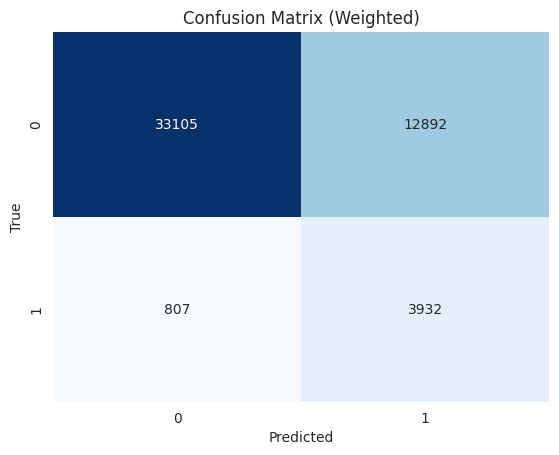

In [17]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### train:test = 7:3

In [18]:
total_size = len(X)
train_size = int(0.7 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X.shape[1]

weighted_model_2 = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model_2.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [19]:
num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model_2.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model_2(data)

        target = target.float()
        output = output.float()
        loss = weighted_model_2.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1388, Loss: 1.3350
Epoch: 1/20, Batch: 50/1388, Loss: 0.8269
Epoch: 1/20, Batch: 100/1388, Loss: 0.8208
Epoch: 1/20, Batch: 150/1388, Loss: 0.9970
Epoch: 1/20, Batch: 200/1388, Loss: 0.8255
Epoch: 1/20, Batch: 250/1388, Loss: 1.2970
Epoch: 1/20, Batch: 300/1388, Loss: 1.0641
Epoch: 1/20, Batch: 350/1388, Loss: 0.8040
Epoch: 1/20, Batch: 400/1388, Loss: 0.8146
Epoch: 1/20, Batch: 450/1388, Loss: 1.0739
Epoch: 1/20, Batch: 500/1388, Loss: 1.0982
Epoch: 1/20, Batch: 550/1388, Loss: 1.0235
Epoch: 1/20, Batch: 600/1388, Loss: 0.7672
Epoch: 1/20, Batch: 650/1388, Loss: 1.1217
Epoch: 1/20, Batch: 700/1388, Loss: 1.0488
Epoch: 1/20, Batch: 750/1388, Loss: 0.7614
Epoch: 1/20, Batch: 800/1388, Loss: 0.7488
Epoch: 1/20, Batch: 850/1388, Loss: 0.8464
Epoch: 1/20, Batch: 900/1388, Loss: 1.4232
Epoch: 1/20, Batch: 950/1388, Loss: 1.1517
Epoch: 1/20, Batch: 1000/1388, Loss: 0.7070
Epoch: 1/20, Batch: 1050/1388, Loss: 0.7789
Epoch: 1/20, Batch: 1100/1388, Lo


Classification Report (Weighted 2):
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     68971
         1.0       0.23      0.82      0.36      7133

    accuracy                           0.73     76104
   macro avg       0.60      0.77      0.60     76104
weighted avg       0.91      0.73      0.79     76104


Confusion Matrix (Weighted 2):


Text(0.5, 23.52222222222222, 'Predicted')

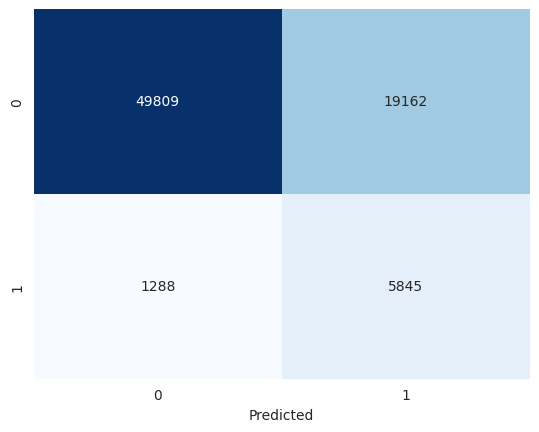

In [20]:
weighted_model_2.eval()

y_true_weighted_2 = []
y_pred_weighted_2 = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model_2(data)

        y_true_weighted_2.extend(target.cpu().numpy())
        y_pred_weighted_2.extend((output > 0.5).cpu().numpy())

y_true_weighted_2 = np.array(y_true_weighted_2)
y_pred_weighted_2 = np.array(y_pred_weighted_2)

print("\nClassification Report (Weighted 2):")
print(classification_report(y_true_weighted_2, y_pred_weighted_2))
print("\nConfusion Matrix (Weighted 2):")
cm_weighted_2 = confusion_matrix(y_true_weighted_2, y_pred_weighted_2)
sns.heatmap(cm_weighted_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')

#### train:test = 6:4

In [21]:
total_size = len(X)
train_size = int(0.4 * total_size)
test_size = total_size - train_size

dataset = HeartDiseaseDataset(X, y)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X.shape[1]

weighted_model_3 = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model_3.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model_3.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model_3(data)

        target = target.float()
        output = output.float()
        loss = weighted_model_3.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/793, Loss: 1.4751
Epoch: 1/20, Batch: 50/793, Loss: 0.8794
Epoch: 1/20, Batch: 100/793, Loss: 1.2703
Epoch: 1/20, Batch: 150/793, Loss: 0.8893
Epoch: 1/20, Batch: 200/793, Loss: 1.0495
Epoch: 1/20, Batch: 250/793, Loss: 0.9784
Epoch: 1/20, Batch: 300/793, Loss: 0.8098
Epoch: 1/20, Batch: 350/793, Loss: 1.1898
Epoch: 1/20, Batch: 400/793, Loss: 1.0679
Epoch: 1/20, Batch: 450/793, Loss: 1.1376
Epoch: 1/20, Batch: 500/793, Loss: 0.9281
Epoch: 1/20, Batch: 550/793, Loss: 1.3112
Epoch: 1/20, Batch: 600/793, Loss: 0.8355
Epoch: 1/20, Batch: 650/793, Loss: 1.1522
Epoch: 1/20, Batch: 700/793, Loss: 0.9090
Epoch: 1/20, Batch: 750/793, Loss: 0.9884
Epoch: 1, Train Loss: 1.0424
Epoch: 2/20, Batch: 0/793, Loss: 0.7794
Epoch: 2/20, Batch: 50/793, Loss: 1.0611
Epoch: 2/20, Batch: 100/793, Loss: 0.8762
Epoch: 2/20, Batch: 150/793, Loss: 1.1038
Epoch: 2/20, Batch: 200/793, Loss: 1.0301
Epoch: 2/20, Batch: 250/793, Loss: 0.9204
Epoch: 2/20, Batch: 300/793, Lo


Classification Report (Weighted 3):
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82    137899
         1.0       0.23      0.84      0.36     14309

    accuracy                           0.72    152208
   macro avg       0.60      0.77      0.59    152208
weighted avg       0.91      0.72      0.78    152208


Confusion Matrix (Weighted 3):


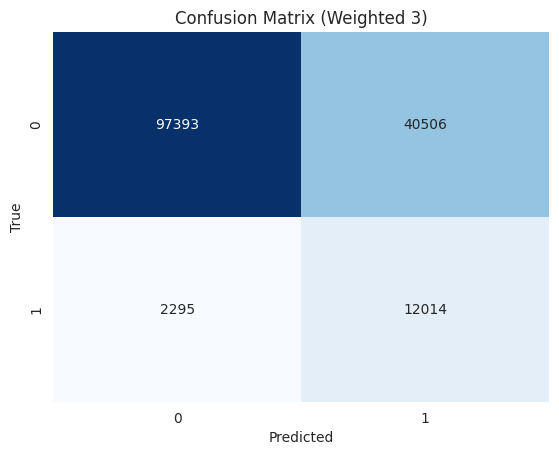

In [22]:
weighted_model_3.eval()

y_true_weighted_3 = []
y_pred_weighted_3 = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model_3(data)

        y_true_weighted_3.extend(target.cpu().numpy())
        y_pred_weighted_3.extend((output > 0.5).cpu().numpy())

y_true_weighted_3 = np.array(y_true_weighted_3)
y_pred_weighted_3 = np.array(y_pred_weighted_3)

print("\nClassification Report (Weighted 3):")
print(classification_report(y_true_weighted_3, y_pred_weighted_3))
print("\nConfusion Matrix (Weighted 3):")
cm_weighted_3 = confusion_matrix(y_true_weighted_3, y_pred_weighted_3)
sns.heatmap(cm_weighted_3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted 3)')
plt.show()

## Dimensional Reduction

### train:test = 4:1

#### LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_lda, y_train)
test_dataset = HeartDiseaseDataset(X_test_lda, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [24]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X_train_lda.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')

Class frequencies: [np.float64(0.9058163828445286), np.float64(0.09418361715547147)]

Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.4922
Epoch: 1/20, Batch: 50/1586, Loss: 1.1024
Epoch: 1/20, Batch: 100/1586, Loss: 1.2312
Epoch: 1/20, Batch: 150/1586, Loss: 1.1032
Epoch: 1/20, Batch: 200/1586, Loss: 1.1683
Epoch: 1/20, Batch: 250/1586, Loss: 0.9839
Epoch: 1/20, Batch: 300/1586, Loss: 0.6296
Epoch: 1/20, Batch: 350/1586, Loss: 0.8645
Epoch: 1/20, Batch: 400/1586, Loss: 0.9037
Epoch: 1/20, Batch: 450/1586, Loss: 1.1042
Epoch: 1/20, Batch: 500/1586, Loss: 1.5702
Epoch: 1/20, Batch: 550/1586, Loss: 1.0814
Epoch: 1/20, Batch: 600/1586, Loss: 0.9109
Epoch: 1/20, Batch: 650/1586, Loss: 1.0043
Epoch: 1/20, Batch: 700/1586, Loss: 1.0972
Epoch: 1/20, Batch: 750/1586, Loss: 0.8656
Epoch: 1/20, Batch: 800/1586, Loss: 0.8819
Epoch: 1/20, Batch: 850/1586, Loss: 1.0515
Epoch: 1/20, Batch: 900/1586, Loss: 0.8900
Epoch: 1/20, Batch: 950/1586, Loss: 0.8843
Epoch: 1/20, Batch: 1000/1586, Loss:


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     45957
         1.0       0.24      0.80      0.37      4779

    accuracy                           0.74     50736
   macro avg       0.60      0.77      0.60     50736
weighted avg       0.90      0.74      0.79     50736


Confusion Matrix (Weighted):


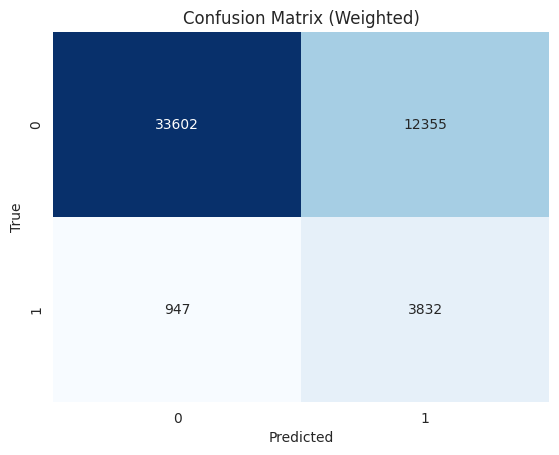

In [25]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### PCA(6)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [27]:
class_0_frequency = np.sum(y_train == 0) / len(y_train)
class_1_frequency = np.sum(y_train == 1) / len(y_train)
class_frequencies = [class_0_frequency, class_1_frequency]
print(f"Class frequencies: {class_frequencies}")

input_features = X_train_pca.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')


Class frequencies: [np.float64(0.9058163828445286), np.float64(0.09418361715547147)]

Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.3281
Epoch: 1/20, Batch: 50/1586, Loss: 0.8667
Epoch: 1/20, Batch: 100/1586, Loss: 1.1205
Epoch: 1/20, Batch: 150/1586, Loss: 1.4602
Epoch: 1/20, Batch: 200/1586, Loss: 1.0484
Epoch: 1/20, Batch: 250/1586, Loss: 1.1738
Epoch: 1/20, Batch: 300/1586, Loss: 0.7465
Epoch: 1/20, Batch: 350/1586, Loss: 1.2448
Epoch: 1/20, Batch: 400/1586, Loss: 1.2782
Epoch: 1/20, Batch: 450/1586, Loss: 0.9241
Epoch: 1/20, Batch: 500/1586, Loss: 1.0658
Epoch: 1/20, Batch: 550/1586, Loss: 1.1492
Epoch: 1/20, Batch: 600/1586, Loss: 0.9507
Epoch: 1/20, Batch: 650/1586, Loss: 1.1058
Epoch: 1/20, Batch: 700/1586, Loss: 0.7979
Epoch: 1/20, Batch: 750/1586, Loss: 1.0993
Epoch: 1/20, Batch: 800/1586, Loss: 0.9007
Epoch: 1/20, Batch: 850/1586, Loss: 0.8968
Epoch: 1/20, Batch: 900/1586, Loss: 0.9147
Epoch: 1/20, Batch: 950/1586, Loss: 0.9121
Epoch: 1/20, Batch: 1000/1586, Loss:


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     45957
         1.0       0.22      0.83      0.34      4779

    accuracy                           0.70     50736
   macro avg       0.60      0.76      0.57     50736
weighted avg       0.90      0.70      0.76     50736


Confusion Matrix (Weighted):


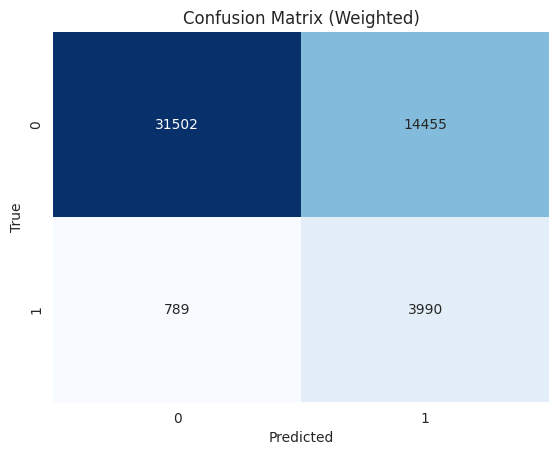

In [28]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

#### PCA(14)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

In [30]:
input_features = X_train_pca.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1586, Loss: 1.4895
Epoch: 1/20, Batch: 50/1586, Loss: 0.9427
Epoch: 1/20, Batch: 100/1586, Loss: 1.0137
Epoch: 1/20, Batch: 150/1586, Loss: 1.2412
Epoch: 1/20, Batch: 200/1586, Loss: 1.0794
Epoch: 1/20, Batch: 250/1586, Loss: 1.5260
Epoch: 1/20, Batch: 300/1586, Loss: 1.1233
Epoch: 1/20, Batch: 350/1586, Loss: 0.7436
Epoch: 1/20, Batch: 400/1586, Loss: 0.9176
Epoch: 1/20, Batch: 450/1586, Loss: 1.5213
Epoch: 1/20, Batch: 500/1586, Loss: 1.0129
Epoch: 1/20, Batch: 550/1586, Loss: 0.7920
Epoch: 1/20, Batch: 600/1586, Loss: 0.8147
Epoch: 1/20, Batch: 650/1586, Loss: 1.0291
Epoch: 1/20, Batch: 700/1586, Loss: 1.0953
Epoch: 1/20, Batch: 750/1586, Loss: 1.0817
Epoch: 1/20, Batch: 800/1586, Loss: 1.0540
Epoch: 1/20, Batch: 850/1586, Loss: 0.8838
Epoch: 1/20, Batch: 900/1586, Loss: 1.0347
Epoch: 1/20, Batch: 950/1586, Loss: 0.9174
Epoch: 1/20, Batch: 1000/1586, Loss: 0.8584
Epoch: 1/20, Batch: 1050/1586, Loss: 0.9732
Epoch: 1/20, Batch: 1100/1586, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82     45957
         1.0       0.23      0.82      0.36      4779

    accuracy                           0.72     50736
   macro avg       0.60      0.77      0.59     50736
weighted avg       0.90      0.72      0.78     50736


Confusion Matrix (Weighted):


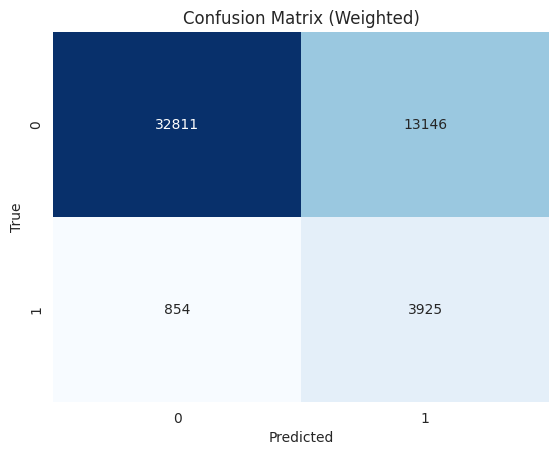

In [31]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

### train:test = 7:3

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X_train_pca.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1388, Loss: 1.3998
Epoch: 1/20, Batch: 50/1388, Loss: 1.2430
Epoch: 1/20, Batch: 100/1388, Loss: 0.8134
Epoch: 1/20, Batch: 150/1388, Loss: 1.3514
Epoch: 1/20, Batch: 200/1388, Loss: 0.8667
Epoch: 1/20, Batch: 250/1388, Loss: 1.2523
Epoch: 1/20, Batch: 300/1388, Loss: 0.9416
Epoch: 1/20, Batch: 350/1388, Loss: 0.9671
Epoch: 1/20, Batch: 400/1388, Loss: 1.1623
Epoch: 1/20, Batch: 450/1388, Loss: 0.8751
Epoch: 1/20, Batch: 500/1388, Loss: 1.2501
Epoch: 1/20, Batch: 550/1388, Loss: 0.8684
Epoch: 1/20, Batch: 600/1388, Loss: 0.8705
Epoch: 1/20, Batch: 650/1388, Loss: 1.1019
Epoch: 1/20, Batch: 700/1388, Loss: 1.0823
Epoch: 1/20, Batch: 750/1388, Loss: 0.9366
Epoch: 1/20, Batch: 800/1388, Loss: 1.1636
Epoch: 1/20, Batch: 850/1388, Loss: 0.7221
Epoch: 1/20, Batch: 900/1388, Loss: 1.0927
Epoch: 1/20, Batch: 950/1388, Loss: 0.8526
Epoch: 1/20, Batch: 1000/1388, Loss: 1.3168
Epoch: 1/20, Batch: 1050/1388, Loss: 1.0884
Epoch: 1/20, Batch: 1100/1388, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     68936
         1.0       0.24      0.82      0.37      7168

    accuracy                           0.74     76104
   macro avg       0.61      0.77      0.60     76104
weighted avg       0.90      0.74      0.79     76104


Confusion Matrix (Weighted):


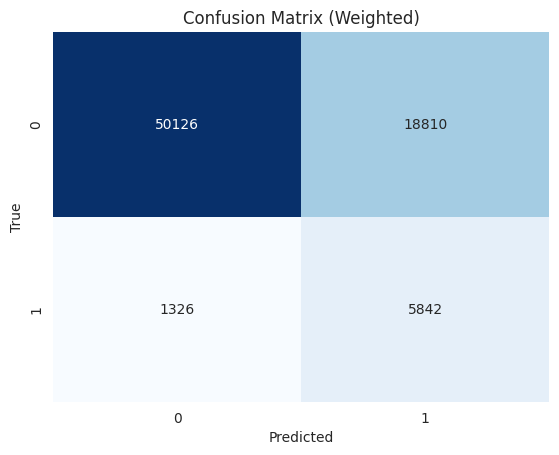

In [33]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()

### train:test = 6:4

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

pca = PCA(n_components=14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

train_dataset = HeartDiseaseDataset(X_train_pca, y_train)
test_dataset = HeartDiseaseDataset(X_test_pca, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

input_features = X_train_pca.shape[1]

weighted_model = HeartDiseaseMLPClassifier(input_size=input_features, class_frequencies=class_frequencies).to(device)

optimizer = optim.Adam(weighted_model.parameters(), lr=0.001, weight_decay=1e-5)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

num_epochs = 20
weighted_train_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    weighted_model.train()
    running_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()

        output = weighted_model(data)

        target = target.float()
        output = output.float()
        loss = weighted_model.get_weighted_loss(output, target)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_idx % 50 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

    avg_train_loss = running_loss / len(train_loader)
    weighted_train_losses.append(avg_train_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {avg_train_loss:.4f}')

print('Training finished!')



Starting training...
Epoch: 1/20, Batch: 0/1190, Loss: 1.6350
Epoch: 1/20, Batch: 50/1190, Loss: 0.9185
Epoch: 1/20, Batch: 100/1190, Loss: 1.0741
Epoch: 1/20, Batch: 150/1190, Loss: 1.2873
Epoch: 1/20, Batch: 200/1190, Loss: 1.2562
Epoch: 1/20, Batch: 250/1190, Loss: 1.0320
Epoch: 1/20, Batch: 300/1190, Loss: 0.9067
Epoch: 1/20, Batch: 350/1190, Loss: 1.5130
Epoch: 1/20, Batch: 400/1190, Loss: 0.9520
Epoch: 1/20, Batch: 450/1190, Loss: 0.7157
Epoch: 1/20, Batch: 500/1190, Loss: 0.9976
Epoch: 1/20, Batch: 550/1190, Loss: 1.1060
Epoch: 1/20, Batch: 600/1190, Loss: 1.2259
Epoch: 1/20, Batch: 650/1190, Loss: 0.9612
Epoch: 1/20, Batch: 700/1190, Loss: 0.8347
Epoch: 1/20, Batch: 750/1190, Loss: 1.1510
Epoch: 1/20, Batch: 800/1190, Loss: 0.9170
Epoch: 1/20, Batch: 850/1190, Loss: 1.5671
Epoch: 1/20, Batch: 900/1190, Loss: 0.8651
Epoch: 1/20, Batch: 950/1190, Loss: 0.8319
Epoch: 1/20, Batch: 1000/1190, Loss: 1.2385
Epoch: 1/20, Batch: 1050/1190, Loss: 0.9492
Epoch: 1/20, Batch: 1100/1190, Lo


Classification Report (Weighted):
              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80     91915
         1.0       0.22      0.85      0.34      9557

    accuracy                           0.69    101472
   macro avg       0.60      0.77      0.57    101472
weighted avg       0.91      0.69      0.76    101472


Confusion Matrix (Weighted):


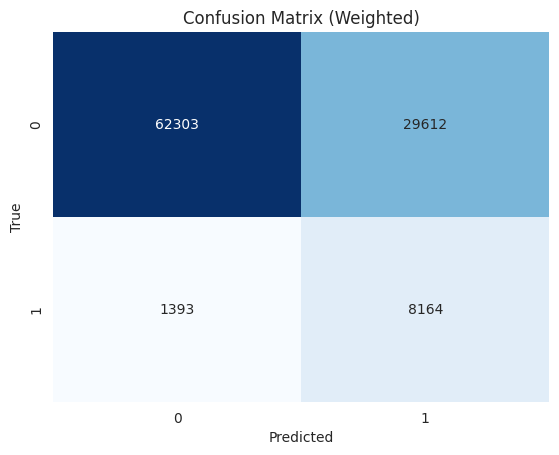

In [35]:
weighted_model.eval()
y_true_weighted = []
y_pred_weighted = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)

        output = weighted_model(data)

        y_true_weighted.extend(target.cpu().numpy())
        y_pred_weighted.extend((output > 0.5).cpu().numpy())

y_true_weighted = np.array(y_true_weighted)
y_pred_weighted = np.array(y_pred_weighted)

print("\nClassification Report (Weighted):")
print(classification_report(y_true_weighted, y_pred_weighted))
print("\nConfusion Matrix (Weighted):")
cm_weighted = confusion_matrix(y_true_weighted, y_pred_weighted)
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Weighted)')
plt.show()